In [1]:
import numpy as np

In [2]:
import pandas as pd
import re
dating = pd.read_csv('dating-full.csv')
count_quotes = 0
count_lowercase = 0

In [3]:
def remove_quotes(column):
    global count_quotes
    count = column.str.count("\'.*\'").sum()
#     print (count)
    if count_quotes != count:
        count_quotes += count
    return column.str.strip('\'')

def convert_lowercase(column):
    global count_lowercase
    count_lowercase = len(column)- column.str.islower().sum()
#     print (count_lowercase)
    return column.str.lower()

In [4]:
dating[['race','race_o','field']] = dating[['race','race_o','field']].apply(remove_quotes)

In [5]:
dating[['field']] = dating[['field']].apply(convert_lowercase)

In [6]:
print ('Quotes removed from', count_quotes, 'cells')
print('Standardized', count_lowercase , 'cells to lower case.')

Quotes removed from 8316 cells
Standardized 5707 cells to lower case.


In [7]:
global_encoder_by_field = {}
def get_encoding(column):
    column = column.astype('category')
    encoding = {}
    for i, category in enumerate(column.cat.categories):
        encoding[category] = i
    global_encoder_by_field[column.name] = encoding
    return column.cat.codes

In [8]:
dating[['race','race_o','gender','field']] = dating[['race','race_o','gender','field']].apply(get_encoding)

In [122]:
print ('Value assigned for male in column gender:', global_encoder_by_field['gender']['male'])
print ('Value assigned for European/Caucasian-American in column race:', global_encoder_by_field['race']['European/Caucasian-American'])
print ('Value assigned for Latino/Hispanic American in column race o:', global_encoder_by_field['race_o']['Latino/Hispanic American'])
print ('Value assigned for law in column field:', global_encoder_by_field['field']['law'])

Value assigned for male in column gender: 1
Value assigned for European/Caucasian-American in column race: 2
Value assigned for Latino/Hispanic American in column race o: 3
Value assigned for law in column field: 121


In [10]:
partner_cols = ['pref_o_attractive','pref_o_sincere','pref_o_intelligence','pref_o_funny','pref_o_ambitious','pref_o_shared_interests']
participant_cols = ['attractive_important', 'sincere_important', 'intelligence_important', 'funny_important', 'ambition_important', 'shared_interests_important']    

In [11]:
total_partner = 0
total_participant = 0

In [12]:
for i in range (0,6):
    total_partner += dating[partner_cols[i]]
    total_participant += dating[participant_cols[i]]
# print (total_partner)
# print (total_participant)

In [13]:
for i in range(0,6):
    dating[partner_cols[i]]/=total_partner
    dating[participant_cols[i]]/=total_participant

In [14]:
for i in range(0,6):
    participant_mean = dating[participant_cols[i]].sum()/len(dating[participant_cols[i]])
    print ('Mean of ', participant_cols[i], ':', round(participant_mean, 2))
for i in range(0,6): 
    partner_mean = dating[partner_cols[i]].sum()/len(dating[partner_cols[i]])
    print ('Mean of ', partner_cols[i], ':', round(partner_mean, 2))

Mean of  attractive_important : 0.22
Mean of  sincere_important : 0.17
Mean of  intelligence_important : 0.2
Mean of  funny_important : 0.17
Mean of  ambition_important : 0.11
Mean of  shared_interests_important : 0.12
Mean of  pref_o_attractive : 0.22
Mean of  pref_o_sincere : 0.17
Mean of  pref_o_intelligence : 0.2
Mean of  pref_o_funny : 0.17
Mean of  pref_o_ambitious : 0.11
Mean of  pref_o_shared_interests : 0.12


In [15]:
dating.to_csv('dating.csv', index = False)

In [16]:
def get_print_participant_mean(dataframe):
    mean_scores = []
    for i in range(0,6):
        participant_mean = dataframe[participant_cols[i]].sum()/len(dataframe[participant_cols[i]])
        print ('Mean of ', participant_cols[i], ':', round(participant_mean, 2))
        mean_scores.append(participant_mean)
    return mean_scores

dating_female = dating[dating['gender'] == 0]
dating_male = dating[dating['gender'] == 1]
female_mean_scores = get_print_participant_mean(dating_female)
male_mean_scores = get_print_participant_mean(dating_male)

Mean of  attractive_important : 0.18
Mean of  sincere_important : 0.18
Mean of  intelligence_important : 0.21
Mean of  funny_important : 0.17
Mean of  ambition_important : 0.13
Mean of  shared_interests_important : 0.12
Mean of  attractive_important : 0.26
Mean of  sincere_important : 0.17
Mean of  intelligence_important : 0.2
Mean of  funny_important : 0.18
Mean of  ambition_important : 0.09
Mean of  shared_interests_important : 0.11


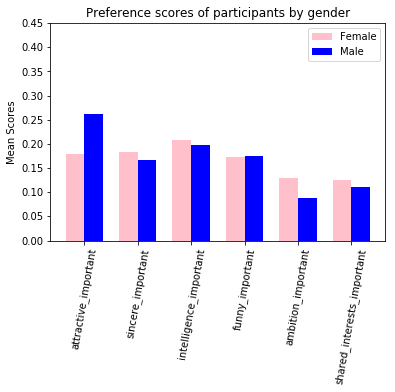

In [26]:
import matplotlib.pyplot as plt
ind = np.arange(6)
width = 0.35
p1 = plt.bar(ind, female_mean_scores, width,color = 'pink')
p2 = plt.bar(ind+width, male_mean_scores, width, color = 'blue')
plt.ylabel('Mean Scores')
plt.title('Preference scores of participants by gender')
plt.xticks(ind+width/2, (participant_cols[0], participant_cols[1], participant_cols[2], 
                 participant_cols[3], participant_cols[4], participant_cols[5]), rotation=80)
plt.yticks(np.arange(0,0.5,0.05))
plt.legend((p1[0], p2[0]), ('Female', 'Male'))

plt.show()

In [18]:
def get_distinct_values_rating_partner(dataframe, attribute):
    print (dataframe[attribute].nunique()) 
    return (dataframe[attribute].unique())

In [19]:
rating_partner_participant = ['attractive_partner','sincere_partner','intelligence_parter', 
                             'funny_partner', 'ambition_partner', 'shared_interests_partner']
unique_values = []
for i in range(0,6):
    unique_values.append(get_distinct_values_rating_partner(dating, rating_partner_participant[i]))

17
13
17
16
14
15


In [20]:
print (unique_values)

[array([ 6. ,  7. ,  5. ,  4. ,  8. ,  9. ,  3. , 10. ,  2. ,  1. ,  0. ,
        6.5,  7.5,  9.5,  8.5,  9.9,  3.5]), array([ 9. ,  8. ,  6. ,  7. ,  5. , 10. ,  4. ,  3. ,  2. ,  1. ,  0. ,
        8.5,  7.5]), array([ 7. ,  8. ,  6. ,  9. , 10. ,  5. ,  4. ,  3. ,  2. ,  1. ,  0. ,
        6.5,  8.5,  7.5,  9.5,  2.5,  5.5]), array([ 7. ,  8. ,  4. ,  9. ,  6. ,  3. ,  5. , 10. ,  1. ,  2. ,  0. ,
        5.5,  6.5,  9.5,  7.5,  8.5]), array([ 6. ,  5. ,  8. , 10. ,  9. ,  3. ,  7. ,  4. ,  2. ,  1. ,  0. ,
        9.5,  7.5,  8.5]), array([ 5. ,  6. ,  8. ,  4. ,  7. ,  3. ,  2. ,  9. , 10. ,  1. ,  0. ,
        7.5,  6.5,  8.5,  5.5])]


In [21]:
def get_success_rate(dataframe, attribute, value):
    dating_attribute_value = dataframe[dataframe[attribute] == value]
    dating_success = dating_attribute_value[dating_attribute_value['decision'] == 1]
    return len(dating_success)*1.0/len(dating_attribute_value)

In [22]:
get_success_rate(dating, rating_partner_participant[0], 1)

0.1

In [23]:
success_rates_all_attributes = []
for i in range(6):
        success_rate_attribute = []
        for value in unique_values[i]:
            success_rate_attribute.append(get_success_rate(dating, rating_partner_participant[i], value))
        success_rates_all_attributes.append(success_rate_attribute)

In [24]:
print (success_rates_all_attributes[0])

[0.3543022415039769, 0.5510355029585798, 0.22608695652173913, 0.10543130990415335, 0.7310679611650486, 0.7955056179775281, 0.06230529595015576, 0.8582677165354331, 0.06091370558375635, 0.1, 0.0, 0.6, 1.0, 0.3333333333333333, 1.0, 1.0, 0.0]


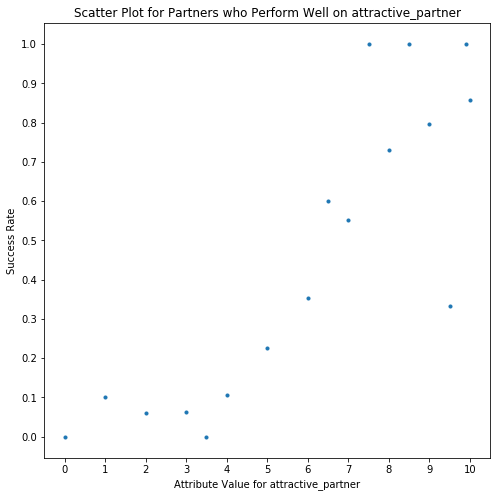

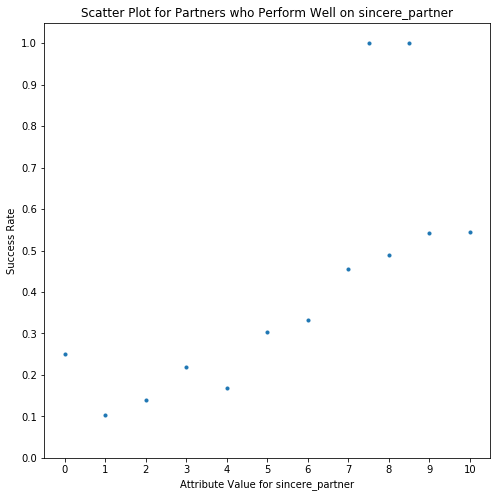

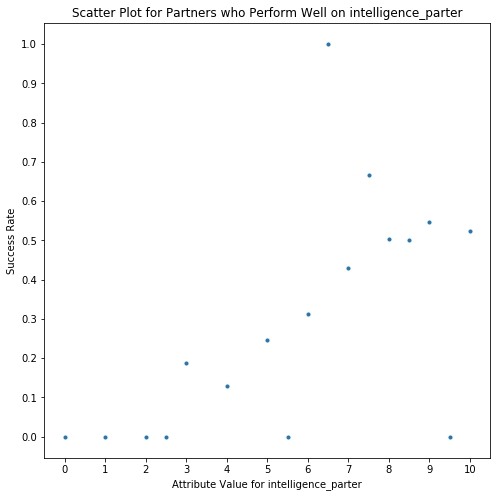

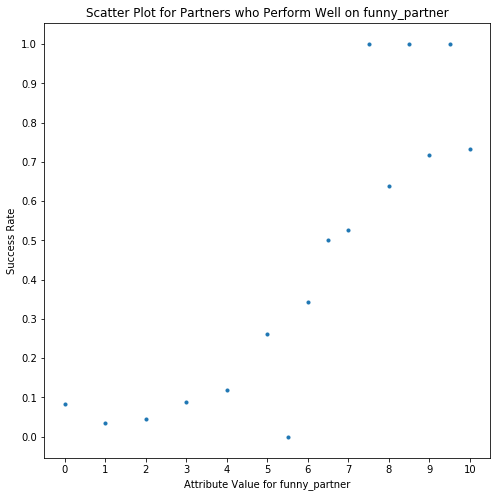

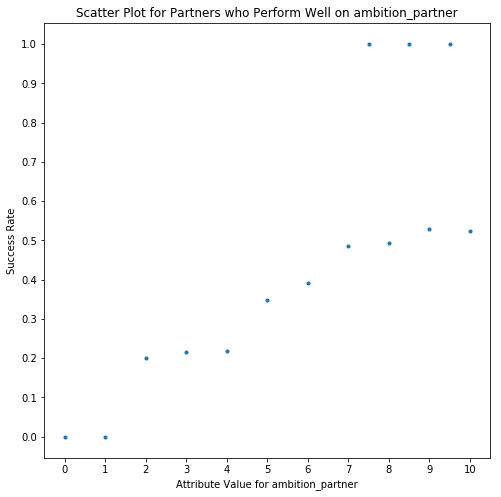

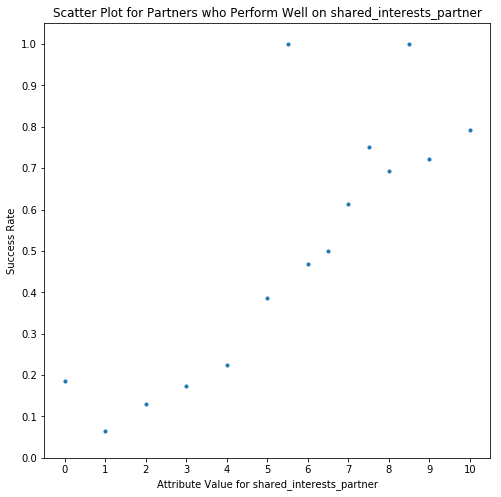

In [25]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(6):
    area = np.pi*3
    plt.figure(figsize=(8,8))
    plt.scatter(unique_values[i], success_rates_all_attributes[i], s=area)

    plt.title('Scatter Plot for Partners who Perform Well on ' + rating_partner_participant[i])
    plt.xlabel('Attribute Value for ' + rating_partner_participant[i])
    plt.ylabel('Success Rate')

    plt.xticks(np.arange(0,11,1))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.show()
    plt.savefig('scatter_plot_' + rating_partner_participant[i])

In [100]:
dating = pd.read_csv("dating.csv")
'''
clean data for columns gaming and reading
'''
column = 'gaming'
range_highest = 10
dating.loc[dating[column] > range_highest,column] = range_highest
dating.loc[dating['reading'] > range_highest,'reading'] = range_highest


In [102]:
def get_binned_column(dataframe, column, num_bins, bin_range):
    dataframe[column] = pd.cut(dataframe[column], bin_range, include_lowest = True,
                               labels = np.arange(num_bins), retbins = False)
    return dataframe[column]

In [103]:
non_binned_cols = ['gender', 'race', 'race_o', 'samerace', 'field', 'decision']
age_cols = ['age', 'age_o']
num_bins = 5
for column in dating:
    if column not in non_binned_cols:
        bin_range = np.arange(0,11,(10-0)/num_bins)
        '''
        Change bin range if needed
        '''
        if column in age_cols:
            bin_range = np.arange(18,59,(58-18)/num_bins)
#             print ("bin range for age ", column)
        elif column in partner_cols or column in participant_cols:
            bin_range = np.arange(0,1.1,(1.0)/num_bins)
#             print ("different bin range ", column)
        elif column == 'interests_correlate':
            bin_range = np.arange(-1,1.1,(1+1)/num_bins)
#             print ("interest column", column)
        
        '''
        get binned column
        '''
        dating[column] = get_binned_column(dating, column, num_bins, bin_range)
        print (column, ": ", dating[column].values_count)

In [115]:
for column in dating:
    if column not in non_binned_cols:
        count = dating[column].value_counts(sort=False)
        print (column, ": ", count.tolist())

age :  [3710, 2932, 97, 0, 5]
age_o :  [3704, 2899, 136, 0, 5]
importance_same_race :  [2980, 1213, 977, 1013, 561]
importance_same_religion :  [3203, 1188, 1110, 742, 501]
pref_o_attractive :  [4333, 1987, 344, 51, 29]
pref_o_sincere :  [5500, 1225, 19, 0, 0]
pref_o_intelligence :  [4601, 2062, 81, 0, 0]
pref_o_funny :  [5616, 1103, 25, 0, 0]
pref_o_ambitious :  [6656, 88, 0, 0, 0]
pref_o_shared_interests :  [6467, 277, 0, 0, 0]
attractive_important :  [4323, 2017, 328, 57, 19]
sincere_important :  [5495, 1235, 14, 0, 0]
intelligence_important :  [4606, 2071, 67, 0, 0]
funny_important :  [5588, 1128, 28, 0, 0]
ambition_important :  [6644, 100, 0, 0, 0]
shared_interests_important :  [6494, 250, 0, 0, 0]
attractive :  [18, 276, 1462, 4122, 866]
sincere :  [33, 117, 487, 2715, 3392]
intelligence :  [34, 185, 1049, 3190, 2286]
funny :  [0, 19, 221, 3191, 3313]
ambition :  [84, 327, 1070, 2876, 2387]
attractive_partner :  [284, 948, 2418, 2390, 704]
sincere_partner :  [94, 353, 1627, 3282,

In [104]:
dating.to_csv("dating-binned.csv", index = False)

In [134]:
'''
split dataset
'''
testset=dating.sample(frac=0.2,random_state=47)
trainset=dating.drop(testset.index)
testset.to_csv("testSet.csv", index = False)
trainset.to_csv("trainingSet.csv", index = False)

In [161]:
count_dict_yes = {}
count_dict_no = {}
for column in trainset:
    count_dict_yes[column] = trainset[trainset['decision'] == 1][column].value_counts(sort=False).to_dict()
    count_dict_no[column] = trainset[trainset['decision'] == 0][column].value_counts(sort=False).to_dict()
    print ('for column', column, 'bin count for decision 1 are', 
           count_dict_yes[column])
    print ('for column', column, 'bin count for decision 0 are',
           count_dict_no[column])

for column gender bin count for decision 1 are {0: 969, 1: 1366}
for column gender bin count for decision 0 are {0: 1676, 1: 1384}
for column age bin count for decision 1 are {0: 1288, 1: 1005, 2: 40, 3: 0, 4: 2}
for column age bin count for decision 0 are {0: 1701, 1: 1321, 2: 37, 3: 0, 4: 1}
for column age_o bin count for decision 1 are {0: 1339, 1: 960, 2: 35, 3: 0, 4: 1}
for column age_o bin count for decision 0 are {0: 1650, 1: 1331, 2: 75, 3: 0, 4: 4}
for column race bin count for decision 1 are {0: 615, 2: 1242, 4: 179, 1: 143, 3: 156}
for column race bin count for decision 0 are {0: 698, 2: 1822, 4: 176, 1: 126, 3: 238}
for column race_o bin count for decision 1 are {0: 464, 2: 1401, 4: 148, 1: 120, 3: 202}
for column race_o bin count for decision 0 are {0: 846, 2: 1625, 4: 208, 1: 158, 3: 223}
for column samerace bin count for decision 1 are {0: 1353, 1: 982}
for column samerace bin count for decision 0 are {0: 1862, 1: 1198}
for column importance_same_race bin count for decis

for column sports bin count for decision 1 are {0: 269, 1: 339, 2: 479, 3: 677, 4: 571}
for column sports bin count for decision 0 are {0: 253, 1: 430, 2: 625, 3: 983, 4: 769}
for column tvsports bin count for decision 1 are {0: 767, 1: 436, 2: 442, 3: 465, 4: 225}
for column tvsports bin count for decision 0 are {0: 963, 1: 592, 2: 555, 3: 643, 4: 307}
for column exercise bin count for decision 1 are {0: 285, 1: 357, 2: 607, 3: 711, 4: 375}
for column exercise bin count for decision 0 are {0: 236, 1: 420, 2: 770, 3: 999, 4: 635}
for column dining bin count for decision 1 are {0: 24, 1: 71, 2: 409, 3: 950, 4: 881}
for column dining bin count for decision 0 are {0: 9, 1: 70, 2: 488, 3: 1289, 4: 1204}
for column museums bin count for decision 1 are {0: 46, 1: 265, 2: 485, 3: 926, 4: 613}
for column museums bin count for decision 0 are {0: 49, 1: 331, 2: 643, 3: 1252, 4: 785}
for column art bin count for decision 1 are {0: 74, 1: 323, 2: 521, 3: 863, 4: 554}
for column art bin count for d

In [184]:
def get_probability(attribute, value, decision):
    if decision == 1:
        value_count = 0
        if value in count_dict_yes[attribute]:
            value_count = count_dict_yes[attribute][value]
        return (value_count+1.0)/(count_dict_yes['decision'][1]+len(count_dict_yes[attribute]))
    elif decision == 0:
        value_count = 0
        if value in count_dict_no[attribute]:
            value_count = count_dict_no[attribute][value]
        return (value_count+1.0)/(count_dict_no['decision'][0]+len(count_dict_no[attribute]))

In [187]:
prior_probability_dec_1 = count_dict_yes['decision'][1]/(count_dict_no['decision'][0]+count_dict_yes['decision'][1])
prior_probability_dec_0 = count_dict_no['decision'][0]/(count_dict_no['decision'][0]+count_dict_yes['decision'][1])

In [200]:
def inference(dataset):
    correct = 0
    len_dataset = len(dataset)
#     len_dataset = 2
    for i in range(len_dataset):
        prob_dec_1 = 1.0
        prob_dec_0 = 1.0
        for column in dataset:
            if column != 'decision':
                prob_dec_1 += np.log(get_probability(column, dataset.iloc[i][column], 1))
                prob_dec_0 += np.log(get_probability(column, dataset.iloc[i][column], 0))
    #             print (column)
        '''
        multiply by prior probabilities
        '''
        prob_dec_1 += np.log(prior_probability_dec_1)
        prob_dec_0 += np.log(prior_probability_dec_0)
#         print (prob_dec_1)
#         print (prob_dec_0)
        predicted_value = 0
        true_value = dataset.iloc[i]['decision']
        if prob_dec_1 > prob_dec_0:
            predicted_value = 1
    #     print ("predicted value is ", predicted_value, "true value is ", true_value)
        if predicted_value == true_value:
            correct += 1
    print ("accuracy ", correct/len_dataset)
    return accuracy

In [201]:
inference(testset)

accuracy  0.7494440326167532


NameError: name 'accuracy' is not defined

In [162]:
print(len(count_dict_yes['field']))
print(len(count_dict_no['field']))

198
193


In [181]:
print(209 in count_dict_yes['field'])

True


In [191]:
print (len(trainset))

5395
